In [1]:
import pandas as pd
import numpy as np

In [2]:
# Seleção dos dados que serão utilizados na análise
dataset2017 = pd.read_csv('../Deputados/data/Ano-2017.csv', sep=';',
                         dtype={'idecadastro': np.str,
                                'ideDocumento': np.str},
                         converters={'vlrLiquido': lambda x: float(x.replace(',','.'))},
                         low_memory=False)
dataset2016 = pd.read_csv('../Deputados/data/Ano-2016.csv', sep=';',
                         dtype={'idecadastro': np.str,
                                'ideDocumento': np.str},
                         converters={'vlrLiquido': lambda x: float(x.replace(',','.'))},
                         low_memory=False)
dataset2015 = pd.read_csv('../Deputados/data/Ano-2015.csv', sep=';',
                         dtype={'idecadastro': np.str,
                                'ideDocumento': np.str},
                         converters={'vlrLiquido': lambda x: float(x.replace(',','.'))},
                         low_memory=False)


# Organização dos dados, limpeza de colunas descartáveis, renomeação de categorias
dataset = pd.concat([dataset2017, dataset2016, dataset2015])
dataset = dataset[['txNomeParlamentar',
                   'sgPartido',
                   'idecadastro', 
                   'sgUF', 
                   'numSubCota', 
                   'txtDescricao', 
                   'datEmissao', 
                   'vlrLiquido', 
                   'numMes', 
                   'numAno', 
                   'ideDocumento']]
dataset['txtDescricao'] = dataset['txtDescricao'].astype('category')
dataset['txtDescricao'].cat.rename_categories(['Assinatura de publicações', 
                                              'Combustíveis e lubrificantes',
                                              'Consultorias, pesquisas e trabalhos técnicos',
                                              'Divulgação de atividade parlamentar', 
                                              'Emissão de bilhete aéreo',
                                              'Alimentação do parlamentar',
                                              'Hospedagem fora do DF',
                                              'Aluguel de aeronaves',
                                              'Aluguel de embarcações',
                                              'Aluguel de carros', 
                                              'Manutenção de escritório',
                                              'Cursos, palestras ou eventos', 
                                              'Passagens aéreas',
                                              'Passagens terrestres ou marítimas',
                                              'Segurança particular',
                                              'Táxi, pedágio e estacionamento', 
                                              'Serviços postais', 
                                              'Telefonia'], inplace=True)
dataset['txtDescricao'] = dataset['txtDescricao'].astype(str)

In [3]:
#dataset = dataset[dataset['sgUF']=='RJ']

In [4]:
posse = pd.read_csv('../Deputados/scrapers/Atuacao_Deputados.csv', encoding='latin1', sep=';')

In [5]:
from datetime import date

def tempo_servico(periodo):
    dias = 0
    if periodo == "1/2/2015 ...":
        periodo = periodo.split(" ")[0]
        periodo = periodo.split("/")
        comeco = date(day= int(periodo[0]), month= int(periodo[1]), year= int(periodo[2]))
        hoje = date(day=21, month=8, year=2017)
        dif = hoje - comeco
        return dif.days/30
    else:
        periodo = periodo.split(",")
        for atuacao in periodo:
            comeco = atuacao.split("até")[0]
            comeco = comeco.split("/")
            comeco = date(day= int(comeco[0]), month= int(comeco[1]), year= int(comeco[2].split(" ")[0]))
            if "..." not in atuacao:
                fim = atuacao.split("até")[1]
                fim = fim.split("/")
                fim = date(day= int(fim[0]), month= int(fim[1]), year= int(fim[2]))
                dif = fim - comeco
                dias += dif.days
            else:
                hoje = date(day=21, month=8, year=2017)
                dif = hoje - comeco
                dias += dif.days
        return dias/30
                

In [6]:
posse['Atuacao em meses'] = posse['Atuacao'].apply(tempo_servico)
posse['Atuacao em meses'] = posse['Atuacao em meses'].map("{0:.2f}".format)

In [7]:
dataset.rename(columns={'txNomeParlamentar':'Nome'}, inplace=True)
dataset = posse.merge(dataset,on='Nome')
dataset.drop(['Nome'], axis=1,inplace=True) #dataset.drop(['Nome','sgUF'], axis=1,inplace=True)

In [8]:
dados = pd.read_csv('../Deputados/scrapers/Detalhes_Deputados.csv',encoding='latin1')
#dados = dados[dados['UF'] == 'RJ']
dados.drop(['Legislatura','UF'], axis=1,inplace=True)
dados.rename(columns={'Partido': 'Partido Atual','Nome':'Nome Civil'}, inplace=True)
dados['idecadastro'] = dados['idecadastro'].astype(str)
dataset = dados.merge(dataset,on='idecadastro')

In [9]:
dados.head(5)

idecadastro                      Nome Civil      Nome Parlamentar  \
0      178957   ABEL SALVADOR MESQUITA JUNIOR     ABEL MESQUITA JR.   
1      178864       JOSE ADAIL CARNEIRO SILVA        ADAIL CARNEIRO   
2      178914  ADALBERTO CAVALCANTI RODRIGUES  ADALBERTO CAVALCANTI   
3      178890            ADELMO CARNEIRO LEAO  ADELMO CARNEIRO LEÃO   
4      178968      ADELSON BARRETO DOS SANTOS       ADELSON BARRETO   

                   Profissao Situacao na Legislatura Atual Sexo Partido Atual  
0                 Empresário                  Em Exercício    M           DEM  
1                          -                  Em Exercício    M            PP  
2  Administrador de Empresas                  Em Exercício    M           PTB  
3               Professor(a)                  Em Exercício    M            PT  
4      Jornalista,Radialista                  Em Exercício    M            PR

In [10]:
dataset.head(5)

idecadastro                     Nome Civil   Nome Parlamentar   Profissao  \
0      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
1      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
2      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
3      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
4      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   

  Situacao na Legislatura Atual Sexo Partido Atual       Atuacao  \
0                  Em Exercício    M           DEM  1/2/2015 ...   
1                  Em Exercício    M           DEM  1/2/2015 ...   
2                  Em Exercício    M           DEM  1/2/2015 ...   
3                  Em Exercício    M           DEM  1/2/2015 ...   
4                  Em Exercício    M           DEM  1/2/2015 ...   

  Atuacao em meses sgPartido sgUF  numSubCota                  txtDescricao  \
0            31.07       DEM   RR           1      Manutenção de escritório   
1            31.07       DEM   RR           3  Combustíveis e lubrificantes   
2            31.07       DEM   RR           3  Combustíveis e lubrificantes   
3            31.07       DEM   RR           3  Combustíveis e lubrificantes   
4            31.07       DEM   RR           3  Combustíveis e lubrificantes   

            datEmissao  vlrLiquido  numMes  numAno ideDocumento  
0  2017-04-26 00:00:00       296.0       4    2017      6266962  
1  2017-05-03 00:00:00       100.0       5    2017      6306682  
2  2017-05-08 00:00:00       150.0       5    2017      6306518  
3  2017-05-10 00:00:00        60.0       5    2017      6306675  
4  2017-05-11 00:00:00        50.0       5    2017      6306669

In [11]:
dataset.to_csv("CEAP-BR.csv", sep=';', encoding='latin1',index=False)

In [12]:
# Contagem de notas fiscais em análise, por categoria
print("Quantidade de notas fiscais em análise, por categoria:")
dataset['txtDescricao'].value_counts()

Quantidade de notas fiscais em análise, por categoria:


Emissão de bilhete aéreo                        271117
Combustíveis e lubrificantes                    181049
Telefonia                                        84684
Serviços postais                                 74714
Alimentação do parlamentar                       69315
Táxi, pedágio e estacionamento                   68428
Manutenção de escritório                         56901
Divulgação de atividade parlamentar              26408
Aluguel de carros                                15256
Hospedagem fora do DF                            14528
Consultorias, pesquisas e trabalhos técnicos      7322
Passagens aéreas                                  6455
Passagens terrestres ou marítimas                 2516
Segurança particular                              2241
Assinatura de publicações                         2183
Aluguel de aeronaves                               815
Aluguel de embarcações                              82
Cursos, palestras ou eventos                        57
Name: txtD

In [13]:
dataset.head()

idecadastro                     Nome Civil   Nome Parlamentar   Profissao  \
0      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
1      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
2      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
3      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
4      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   

  Situacao na Legislatura Atual Sexo Partido Atual       Atuacao  \
0                  Em Exercício    M           DEM  1/2/2015 ...   
1                  Em Exercício    M           DEM  1/2/2015 ...   
2                  Em Exercício    M           DEM  1/2/2015 ...   
3                  Em Exercício    M           DEM  1/2/2015 ...   
4                  Em Exercício    M           DEM  1/2/2015 ...   

  Atuacao em meses sgPartido sgUF  numSubCota                  txtDescricao  \
0            31.07       DEM   RR           1      Manutenção de escritório   
1            31.07       DEM   RR           3  Combustíveis e lubrificantes   
2            31.07       DEM   RR           3  Combustíveis e lubrificantes   
3            31.07       DEM   RR           3  Combustíveis e lubrificantes   
4            31.07       DEM   RR           3  Combustíveis e lubrificantes   

            datEmissao  vlrLiquido  numMes  numAno ideDocumento  
0  2017-04-26 00:00:00       296.0       4    2017      6266962  
1  2017-05-03 00:00:00       100.0       5    2017      6306682  
2  2017-05-08 00:00:00       150.0       5    2017      6306518  
3  2017-05-10 00:00:00        60.0       5    2017      6306675  
4  2017-05-11 00:00:00        50.0       5    2017      6306669

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884071 entries, 0 to 884070
Data columns (total 18 columns):
idecadastro                      884071 non-null object
Nome Civil                       884071 non-null object
Nome Parlamentar                 884071 non-null object
Profissao                        884071 non-null object
Situacao na Legislatura Atual    884071 non-null object
Sexo                             884071 non-null object
Partido Atual                    884071 non-null object
Atuacao                          884071 non-null object
Atuacao em meses                 884071 non-null object
sgPartido                        884071 non-null object
sgUF                             884071 non-null object
numSubCota                       884071 non-null int64
txtDescricao                     884071 non-null object
datEmissao                       866194 non-null object
vlrLiquido                       884071 non-null float64
numMes                           884071 non-null 

In [15]:
dataset.groupby(['Nome Civil','sgPartido'])['vlrLiquido'].sum().sort_values(ascending=False)

Nome Civil                                sgPartido
JOHNATHAN PEREIRA DE JESUS                PRB          1369412.36
ÉDIO VIEIRA LOPES                         PR           1355543.07
VINICIUS DE AZEVEDO GURGEL                PR           1322934.08
ALAN RICK MIRANDA                         PRB          1318617.83
NILTON BALBINO                            PTB          1316208.00
HIRAN MANUEL GONCALVES DA SILVA           PP           1309990.52
ABEL SALVADOR MESQUITA JUNIOR             DEM          1294642.78
REMIDIO MONAI MONTESSI                    PR           1294119.17
JESSICA ROJAS SALES                       PMDB         1288358.20
CARLOS AUGUSTO ANDRADE SILVA              PHS          1286133.89
LINDOMAR BARBOSA ALVES                    PRB          1274964.91
WHERLES FERNANDES DA ROCHA                PSDB         1274357.75
ZENAIDE MAIA CALADO PEREIRA DOS SANTOS    PR           1274016.86
DOMINGOS GOMES DE AGUIAR NETO             PSD          1273739.30
LEONARDO CUNHA DE BRITO 

In [16]:
dataset.groupby(['Nome Civil','sgPartido'])['vlrLiquido'].sum().sort_values()

Nome Civil                                sgPartido
MARCIO CAMPOS MONTEIRO                    PSDB              14.18
ROGÉRIO SILVA SANTOS                      PMDB              41.87
SEBASTIAO IGNACIO DE OLIVEIRA JUNIOR      PR               116.41
JOSIAS GOMES DA SILVA                     PT              1003.62
MIGUEL CORRÊA DA SILVA JÚNIOR             PT              1840.11
ODAIR JOSÉ DA CUNHA                       PT              1897.29
FELIPE AUGUSTO LYRA CARRERAS              PSB             3025.76
GIOVANI BATISTA FELTES                    PMDB            4206.66
NELSON NAHIM MATHEUS DE OLIVEIRA          PSD             5086.14
ARNALDO CALIL PEREIRA JARDIM              PPS             6208.88
ATILA ALEXANDRE NUNES PEREIRA             PMDB            6485.39
ANTONIO FLORIANO PEREIRA PESARO           PSDB           12090.88
RODRIGO SANTOS DA ROCHA LOURES            PMDB           12678.29
REJANE RIBEIRO SOUSA DIAS                 PT             13212.61
MARCIO DELLA VALLE BIOLC

In [17]:
df = dataset.groupby(['Nome Civil','sgPartido','numAno']).sum()

In [18]:
result_df = df.loc[df.index.get_level_values('numAno') == 2017]
result_df['vlrLiquido'].sort_values(ascending=False)

Nome Civil                               sgPartido  numAno
ALAN RICK MIRANDA                        PRB        2017      304308.39
ZENAIDE MAIA CALADO PEREIRA DOS SANTOS   PR         2017      292961.27
NIVALDO FERREIRA DE ALBUQUERQUE NETO     PRP        2017      292045.65
LUIZ ODORICO MONTEIRO DE ANDRADE         PSB        2017      290129.15
CARLOS VICTOR GUTERRES MENDES            PSD        2017      287691.11
LINDOMAR BARBOSA ALVES                   PRB        2017      286413.18
JOHNATHAN PEREIRA DE JESUS               PRB        2017      285700.63
MARIA GORETE PEREIRA                     PR         2017      283143.82
EXPEDITO GONCALVES FERREIRA NETTO        PSD        2017      282343.86
DAGOBERTO NOGUEIRA FILHO                 PDT        2017      282333.90
MOISES DINIZ LIMA                        PCdoB      2017      280072.05
RUBENS PEREIRA E SILVA JUNIOR            PCdoB      2017      279198.90
JESSICA ROJAS SALES                      PMDB       2017      278309.44
VANDE

In [19]:
valor = dataset.groupby('sgPartido')['vlrLiquido'].sum().sort_values(ascending=False)
valor.head(30)

sgPartido
PMDB     6.690958e+07
PT       6.163547e+07
PP       4.848202e+07
PSDB     4.842289e+07
PR       4.077421e+07
PSD      3.779344e+07
PSB      3.626992e+07
DEM      2.878404e+07
PRB      2.521972e+07
PDT      2.110137e+07
PTB      2.053458e+07
PODE     1.535471e+07
SD       1.453428e+07
PCdoB    1.282658e+07
PPS      8.531037e+06
PSC      8.528746e+06
PHS      7.010041e+06
PV       6.107823e+06
PSOL     5.137567e+06
PROS     3.866179e+06
REDE     3.429493e+06
PTdoB    3.315743e+06
PEN      3.135566e+06
PSL      2.101042e+06
PMB      1.023936e+06
PRP      6.053950e+05
PRTB     1.674133e+05
Name: vlrLiquido, dtype: float64

In [20]:
df = dataset.groupby(['Nome Civil','sgPartido'])['vlrLiquido'].sum()

In [21]:
qtd = df.index.get_level_values('sgPartido').value_counts()
qtd.head(30)

PMDB     82
PT       68
PSDB     60
PP       53
PR       43
PSD      42
PSB      41
DEM      32
PRB      26
PDT      25
PTB      21
PODE     16
PCdoB    14
SD       14
PPS      12
PSC      11
PV        8
PHS       7
PSOL      6
PROS      5
REDE      4
PTdoB     4
PEN       3
PSL       2
PRTB      1
PMB       1
PRP       1
Name: sgPartido, dtype: int64

In [22]:
partidos = pd.DataFrame(data=list(qtd.sort_index()),index=list(qtd.sort_index().index),columns=['Quantidade'])

In [23]:
partidos['vlrLiquido'] = list(valor.sort_index())
partidos['Media'] = partidos['vlrLiquido']/partidos['Quantidade']
partidos['Media'] = partidos['Media'].map("R$ {0:.2f}".format)
partidos.sort_values('Media',ascending=False)

Quantidade    vlrLiquido          Media
PTB            21  2.053458e+07   R$ 977837.21
PRB            26  2.521972e+07   R$ 969989.27
PODE           16  1.535471e+07   R$ 959669.07
PR             43  4.077421e+07   R$ 948237.43
PCdoB          14  1.282658e+07   R$ 916184.40
PP             53  4.848202e+07   R$ 914755.17
PT             68  6.163547e+07   R$ 906403.92
PSD            42  3.779344e+07   R$ 899843.89
DEM            32  2.878404e+07   R$ 899501.13
PSB            41  3.626992e+07   R$ 884632.09
REDE            4  3.429493e+06   R$ 857373.17
PSOL            6  5.137567e+06   R$ 856261.20
PDT            25  2.110137e+07   R$ 844054.96
PTdoB           4  3.315743e+06   R$ 828935.85
PMDB           82  6.690958e+07   R$ 815970.53
PSDB           60  4.842289e+07   R$ 807048.21
PSC            11  8.528746e+06   R$ 775340.57
PROS            5  3.866179e+06   R$ 773235.87
PV              8  6.107823e+06   R$ 763477.88
PPS            12  8.531037e+06   R$ 710919.73
PRP             1  6.053950e+05   R$ 605394.97
PRTB            1  1.674133e+05   R$ 167413.30
PSL             2  2.101042e+06  R$ 1050521.13
PEN             3  3.135566e+06  R$ 1045188.61
SD             14  1.453428e+07  R$ 1038162.85
PMB             1  1.023936e+06  R$ 1023936.32
PHS             7  7.010041e+06  R$ 1001434.45

In [24]:
aux = pd.pivot_table(dataset[['vlrLiquido','sgPartido','txtDescricao']], index=['sgPartido'],
...                     columns=['txtDescricao'], aggfunc='sum', fill_value= 0)  

aux = aux['vlrLiquido']
aux['Total CEAP'] = aux.sum(axis=1)
aux.sort_values('Total CEAP',ascending=False,inplace=True)

In [25]:
sum(aux.loc['DEM']) #bateu

57568072.500000246

In [26]:
aux.sum().sort_values(ascending=False)

txtDescricao
Total CEAP                                      5.316028e+08
Divulgação de atividade parlamentar             1.242011e+08
Emissão de bilhete aéreo                        1.169311e+08
Aluguel de carros                               6.419144e+07
Manutenção de escritório                        5.856175e+07
Consultorias, pesquisas e trabalhos técnicos    5.404658e+07
Combustíveis e lubrificantes                    4.495459e+07
Telefonia                                       2.849124e+07
Serviços postais                                9.818415e+06
Aluguel de aeronaves                            7.510821e+06
Passagens aéreas                                6.348578e+06
Hospedagem fora do DF                           4.814662e+06
Segurança particular                            4.061726e+06
Alimentação do parlamentar                      4.012306e+06
Táxi, pedágio e estacionamento                  2.242253e+06
Assinatura de publicações                       7.947144e+05
Cursos, pal

In [27]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [28]:
pct = aux.drop('Total CEAP', axis=1)
for partido in dataset['sgPartido'].unique():
    pct.loc[partido] = (pct.loc[partido]/sum(pct.loc[partido]))*100

pct.style.\
    apply(highlight_max, axis=1).\
    format("{:.2f}%")

In [29]:
sum(pct.loc['DEM']) #bateu

100.00000000000003

In [30]:
aux['Manutenção de escritório']

sgPartido
PMDB     6190592.39
PT       9080986.20
PP       4807841.24
PSDB     6355994.30
PR       5046458.05
PSD      3679492.55
PSB      3885998.95
DEM      2223739.21
PRB      2670495.25
PDT      2087366.39
PTB      1780436.52
PODE     1294543.49
SD       1728279.00
PCdoB    1881592.28
PPS      1013828.48
PSC       656973.49
PHS       604312.56
PV        617257.08
PSOL     1020498.69
PROS      388861.69
REDE      680698.64
PTdoB     435963.47
PEN       239853.34
PSL       184912.37
PMB         3654.23
PRP         1116.12
PRTB           0.00
Name: Manutenção de escritório, dtype: float64

In [31]:
dep = pd.pivot_table(dataset[['vlrLiquido','Nome Civil','txtDescricao']], index=['Nome Civil'],
...                     columns=['txtDescricao'], aggfunc='sum', fill_value= 0)  

dep = dep['vlrLiquido']
dep['Total CEAP'] = dep.sum(axis=1)
dep.sort_values('Total CEAP',ascending=False,inplace=True)
dep.head()

txtDescricao                Alimentação do parlamentar  Aluguel de aeronaves  \
Nome Civil                                                                     
JOHNATHAN PEREIRA DE JESUS                        0.00                   0.0   
ÉDIO VIEIRA LOPES                               648.75               60625.0   
VINICIUS DE AZEVEDO GURGEL                        0.00                   0.0   
ALAN RICK MIRANDA                             13222.13                5000.0   
NILTON BALBINO                                    0.00                   0.0   

txtDescricao                Aluguel de carros  Aluguel de embarcações  \
Nome Civil                                                              
JOHNATHAN PEREIRA DE JESUS          308000.00                     0.0   
ÉDIO VIEIRA LOPES                   244770.85                  5500.0   
VINICIUS DE AZEVEDO GURGEL          208722.80                     0.0   
ALAN RICK MIRANDA                   131429.02                     0.0   
NILTON BALBINO                      289000.00                     0.0   

txtDescricao                Assinatura de publicações  \
Nome Civil                                              
JOHNATHAN PEREIRA DE JESUS                        0.0   
ÉDIO VIEIRA LOPES                                 0.0   
VINICIUS DE AZEVEDO GURGEL                        0.0   
ALAN RICK MIRANDA                              1800.0   
NILTON BALBINO                                    0.0   

txtDescricao                Combustíveis e lubrificantes  \
Nome Civil                                                 
JOHNATHAN PEREIRA DE JESUS                     145531.42   
ÉDIO VIEIRA LOPES                              125659.81   
VINICIUS DE AZEVEDO GURGEL                     142714.78   
ALAN RICK MIRANDA                              136743.65   
NILTON BALBINO                                  84023.23   

txtDescricao                Consultorias, pesquisas e trabalhos técnicos  \
Nome Civil                                                                 
JOHNATHAN PEREIRA DE JESUS                                      268000.0   
ÉDIO VIEIRA LOPES                                                21227.1   
VINICIUS DE AZEVEDO GURGEL                                       95000.0   
ALAN RICK MIRANDA                                               103495.0   
NILTON BALBINO                                                       0.0   

txtDescricao                Cursos, palestras ou eventos  \
Nome Civil                                                 
JOHNATHAN PEREIRA DE JESUS                           0.0   
ÉDIO VIEIRA LOPES                                    0.0   
VINICIUS DE AZEVEDO GURGEL                           0.0   
ALAN RICK MIRANDA                                    0.0   
NILTON BALBINO                                       0.0   

txtDescricao                Divulgação de atividade parlamentar  \
Nome Civil                                                        
JOHNATHAN PEREIRA DE JESUS                            445300.00   
ÉDIO VIEIRA LOPES                                     259670.00   
VINICIUS DE AZEVEDO GURGEL                            102000.00   
ALAN RICK MIRANDA                                     604170.00   
NILTON BALBINO                                        572093.14   

txtDescricao                Emissão de bilhete aéreo  Hospedagem fora do DF  \
Nome Civil                                                                    
JOHNATHAN PEREIRA DE JESUS                 166817.44                6884.40   
ÉDIO VIEIRA LOPES                          438299.65                9322.74   
VINICIUS DE AZEVEDO GURGEL                 230848.25                   0.00   
ALAN RICK MIRANDA                          201540.87               10692.75   
NILTON BALBINO                             264098.07                   0.00   

txtDescricao                Manutenção de escritório  Passagens aéreas  \
Nome Civil                                            

In [32]:
pctDp = dep.drop('Total CEAP', axis=1)
for deputado in dataset['Nome Civil'].unique():
    pctDp.loc[deputado] = (pctDp.loc[deputado]/sum(pctDp.loc[deputado]))*100

pctDp.style.\
    apply(highlight_max, axis=1).\
    format("{:.2f}%")

In [33]:
# Soma de pessoas que utilizaram a CEAP na atual legislatura
print("Pessoas que utilizaram a CEAP:", dataset.idecadastro.nunique())

Pessoas que utilizaram a CEAP: 602


In [34]:
#dep1 = pd.read_csv('candidatos-2014-RJ-deputado-federal.csv',encoding='latin1',sep=';')

In [35]:
dep2 = pd.read_csv('Resultado_da_Eleicao.csv',encoding='latin1',sep=';',
                   converters={'Votação': lambda x: int(x.replace('.',''))})

In [36]:
#dep1.head()

In [37]:
#dep1.drop(['Situação Pós-Pleito','Cargo','Situação','Partido','Coligação'], axis=1,inplace=True)

In [38]:
#dep1.head()

In [39]:
dep2.head()

UF             Cargo      Nr                        Candidato Partido  \
0   AC  Deputado Federal  1314.0     RAIMUNDO ANGELIM VASCONCELOS      PT   
1  NaN               NaN  4040.0  CARLOS CESAR CORREIA DE MESSIAS     PSB   
2  NaN               NaN  4545.0       WHERLES FERNANDES DA ROCHA    PSDB   
3  NaN               NaN  1331.0          LEONARDO CUNHA DE BRITO      PT   
4  NaN               NaN  1515.0              JÉSSICA ROJAS SALES    PMDB   

                                           Coligação       Situação  Votação  \
0  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    39844   
1  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    26448   
2  PP / PMDB / PSC / PR / PPS / PTC / PSDB / PSD ...  Eleito por QP    23466   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    20876   
4  PP / PMDB / PSC / PR / PPS / PTC / PSDB / PSD ...  Eleito por QP    20339   

  % Válidos  Unnamed: 9  
0      9,98         NaN  
1      6,63         NaN  
2      5,88         NaN  
3      5,23         NaN  
4      5,09         NaN

In [40]:
dep2.drop(['UF','Cargo','Nr','Unnamed: 9'], axis=1,inplace=True)
dep2['% Válidos'] = dep2['% Válidos'].astype(str)
dep2['% Válidos'] = dep2['% Válidos'].apply(lambda x: float(x.replace(',','.')))
dep2 = dep2[dep2['Situação']!= 'Não eleito']
#dep2 = dep2[dep2['Votação']!= 7079046]
#dep2['Nr'] = dep2['Nr'].astype(int)

In [41]:
dep2.head()

Candidato Partido  \
0     RAIMUNDO ANGELIM VASCONCELOS      PT   
1  CARLOS CESAR CORREIA DE MESSIAS     PSB   
2       WHERLES FERNANDES DA ROCHA    PSDB   
3          LEONARDO CUNHA DE BRITO      PT   
4              JÉSSICA ROJAS SALES    PMDB   

                                           Coligação       Situação  Votação  \
0  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    39844   
1  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    26448   
2  PP / PMDB / PSC / PR / PPS / PTC / PSDB / PSD ...  Eleito por QP    23466   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    20876   
4  PP / PMDB / PSC / PR / PPS / PTC / PSDB / PSD ...  Eleito por QP    20339   

   % Válidos  
0       9.98  
1       6.63  
2       5.88  
3       5.23  
4       5.09

In [42]:
dep2.rename(columns={'Candidato':'Nome Civil'}, inplace=True) #dep1.rename(columns={'Número': 'Nr','Nome Completo':'Nome Civil'}, inplace=True)
deps = dep2 #deps = dep1.merge(dep2,on='Nr')
deps.head()

Nome Civil Partido  \
0     RAIMUNDO ANGELIM VASCONCELOS      PT   
1  CARLOS CESAR CORREIA DE MESSIAS     PSB   
2       WHERLES FERNANDES DA ROCHA    PSDB   
3          LEONARDO CUNHA DE BRITO      PT   
4              JÉSSICA ROJAS SALES    PMDB   

                                           Coligação       Situação  Votação  \
0  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    39844   
1  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    26448   
2  PP / PMDB / PSC / PR / PPS / PTC / PSDB / PSD ...  Eleito por QP    23466   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    20876   
4  PP / PMDB / PSC / PR / PPS / PTC / PSDB / PSD ...  Eleito por QP    20339   

   % Válidos  
0       9.98  
1       6.63  
2       5.88  
3       5.23  
4       5.09

In [43]:
from unicodedata import normalize
from string import punctuation

def remover_acentos(txt):
    txt = ''.join([letter for letter in txt if letter not in punctuation])
    return normalize('NFKD', txt).encode('ASCII','ignore').decode('ASCII')

In [44]:
depAux = dep.reset_index()
deps['Nome Civil'] = deps['Nome Civil'].apply(lambda x: remover_acentos(str(x)))
depAux['Nome Civil'] = depAux['Nome Civil'].apply(lambda x: remover_acentos(x))
deputados = deps.merge(depAux,on='Nome Civil')

In [45]:
deputados.sort_values('Total CEAP',ascending=False,inplace=True)
#deputados.set_index('Numero',inplace=True)

In [46]:
deputados.head(58)

Nome Civil  Partido  \
426               JOHNATHAN PEREIRA DE JESUS      PRB   
428                        EDIO VIEIRA LOPES     PMDB   
29                VINICIUS DE AZEVEDO GURGEL       PR   
7                          ALAN RICK MIRANDA      PRB   
420                           NILTON BALBINO      PTB   
429          HIRAN MANUEL GONCALVES DA SILVA      PMN   
430            ABEL SALVADOR MESQUITA JUNIOR      PDT   
427                   REMIDIO MONAI MONTESSI       PR   
4                        JESSICA ROJAS SALES     PMDB   
432             CARLOS AUGUSTO ANDRADE SILVA      PHS   
424                   LINDOMAR BARBOSA ALVES     PMDB   
2                 WHERLES FERNANDES DA ROCHA     PSDB   
412   ZENAIDE MAIA CALADO PEREIRA DOS SANTOS       PR   
80             DOMINGOS GOMES DE AGUIAR NETO     PROS   
3                    LEONARDO CUNHA DE BRITO       PT   
423        EXPEDITO GONCALVES FERREIRA NETTO       SD   
84                      MARIA GORETE PEREIRA       PR   
19                              SILAS CAMARA      PSD   
253                 ARNALDO JORDY FIGUEIREDO      PPS   
79                      JOSE NOBRE GUIMARAES       PT   
143            RUBENS PEREIRA E SILVA JUNIOR  PC do B   
418            MARCOS ROGERIO DA SILVA BRITO      PDT   
263                   ROMULO JOSE DE GOUVEIA      PSD   
28            LUIZ GIONILSON PINHEIRO BORGES     PMDB   
87          LUIZ ODORICO MONTEIRO DE ANDRADE       PT   
415            ANTONIO JACOME DE LIMA JUNIOR      PMN   
232                      SAGUAS MORAES SOUSA       PT   
305             JULIO CESAR DE CARVALHO LIMA      PSD   
260                  JOSE WELLINGTON ROBERTO       PR   
431          MARIA HELENA VERONESE RODRIGUES      PSB   
26   ANTONIO ROBERTO RODRIGUES GOES DA SILVA      PDT   
243               JOSE ROBERTO OLIVEIRA FARO       PT   
416   CARLOS ALBERTO DE SOUSA ROSADO SEGUNDO       PP   
92                   RAIMUNDO GOMES DE MATOS     PSDB   
89                  RONALDO MANCHADO MARTINS      PRB   
146                  PEDRO FERNANDES RIBEIRO      PTB   
93         JOSE AIRTON FELIX CIRILO DA SILVA       PT   
147            CARLOS VICTOR GUTERRES MENDES       PV   
91                  JOSE MARIA MACEDO JUNIOR      PSL   
83              MOSES HAENDEL MELO RODRIGUES      PPS   
144             CLEBER VERDE CORDEIRO MENDES      PRB   
286             JOSE CAVALCANTI ALVES JUNIOR      PTB   
224            VANDER LUIZ DOS SANTOS LOUBET       PT   
31                    ANDRE DOS SANTOS ABDON      PRB   
422               LUIZ CLAUDIO PEREIRA ALVES       PR   
435                   ALCEU MOREIRA DA SILVA     PMDB   
583                        CESAR HANNA HALUM      PRB   
411        FABIO SALUSTINO MESQUITA DE FARIA      PSD   
249      ELCIONE THEREZINHA ZAHLUTH BARBALHO     PMDB   
254                FRANCISCO ALVES DE AGUIAR      PSD   
283           ADALBERTO CAVALCANTI RODRIGUES      PTB   
142              HILDO AUGUSTO DA ROCHA NETO     PMDB   
15                 PAULO FERNANDO DOS SANTOS       PT   
247             JOSE GERALDO TORRES DA SILVA       PT   
30      MARCIVANIA DO SOCORRO DA ROCHA FLEXA       PT   
221              CARLOS EDUARDO XAVIER MARUN     PMDB   
153         ANTONIO DA CRUZ FILGUEIRA JUNIOR      PEN   
22                 HISSA NAGIB ABRAHAO FILHO      PPS   

                                             Coligação          Situação  \
426  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
428  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
29   PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
7    PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
420  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   
429  PRTB / PHS / PPL / PMN / PEN / PSDC / PT do B ...     Eleito por QP   
430                      PT / PDT / PV / PTC / PC do B     Eleito por QP   
427  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Ele

In [47]:
#vts = pd.read_csv('Quoc_eleitoral_e_partidario.csv',encoding='latin1', sep=';')

In [48]:
#vts.head()

In [49]:
#QE = int(vts['QE'][0].replace(".",""))
#vagas = int(str(vts['Qt Vagas  QE'][0]).replace(".",""))
#votosValidos = int(str(vts['Qt VotosVálidos'][0]).replace(".",""))
#vts = vts.loc[0:vts[vts['Seletores'] == 'Subtotal'].index.tolist()[0]-1]
#vts.drop(['Seletores', 'Cargo', 'UF', 'Qt VotosVálidos', 'Qt Vagas  QE', 'QE','Unnamed: 10'], axis=1,inplace=True)

In [50]:
#vts.head(20)

In [51]:
#deputados[deputados['Votação'] > QE].sort_values('Votação',ascending=False)

In [52]:
#ultimo = dep2.sort_values('Votação',ascending=False).loc[45]['Votação']

In [53]:
#deputados[deputados['Votação'] < ultimo].sort_values('Votação')

In [54]:
prop = pd.read_json('proposicoesdalegislatura55.json', orient='split')

In [55]:
prop.head()

ANO_PROPOSICAO                       AREAS_TEMATICAS_APRESENTACAO  \
0          2015.0                                 TRABALHO E EMPREGO   
1          2015.0  COMUNICAÇÕES,DIREITOS HUMANOS, MINORIAS E CIDA...   
2          2015.0       ORGANIZAÇÃO POLÍTICA, PARTIDÁRIA E ELEITORAL   
3          2015.0  INDÚSTRIA, COMÉRCIO E ABASTECIMENTO,RECURSOS H...   
4          2015.0                  DESENVOLVIMENTO URBANO E TRÂNSITO   

   COD_ORGAO_ORIGEM  COD_PARLAMENTAR_ORIGEM  COD_PARTIDO_POLITICO  \
0                -1                 5310708                   125   
1                -1                 5310554                    -1   
2                -1                 5310405                   104   
3                -1                 5310802                   128   
4                -1                 5310479                   127   

   COD_PROPOSICAO_ORIGEM COD_SEXO  COD_TIPO_AUTOR_ORIGEM  \
0               961710.0        M  TipoParlamentar_10000   
1               944272.0        M  TipoParlamentar_10000   
2               962502.0        M  TipoParlamentar_10000   
3               949186.0        M  TipoParlamentar_10000   
4               949096.0        M  TipoParlamentar_10000   

   COD_TIPO_NORMA_JURIDICA_ORIGEM  COD_TIPO_PARLAMENTAR  \
0                              -1                 10000   
1                              -1                 10000   
2                              -1                 10000   
3                              -1                 10000   
4                              -1                 10000   

              ...              NUM_LEGISLATURA_APRESEN  NUM_LEGISLATURA_LEI  \
0             ...                                   55                   -1   
1             ...                                   55                   -1   
2             ...                                   55                   -1   
3             ...                                   55                   -1   
4             ...                                   55                   -1   

  NUM_PROPOSICAO NUM_SESSAO_LEGISLATIVA_APRESEN NUM_SESSAO_LEGISLATIVA_LEI  \
0          569.0                            1.0                         -1   
1           19.0                            1.0                         -1   
2          581.0                            1.0                         -1   
3          486.0                            1.0                         -1   
4          467.0                            1.0                         -1   

  SIG_NORMA_JURIDICA SIG_PARTIDO_POLITICO SIG_TIPO_PROPOSICAO SIG_UF  \
0                N/A                  PSB                  PL     TO   
1                N/A                  N/A                  PL    N/A   
2                N/A                  PDT                  PL     SP   
3                N/A                 PSDB                  PL     SP   
4                N/A                  PSD                  PL     SP   

  TEX_REGIAO_GEOGRAFICA_AUTOR  
0                       NORTE  
1                         N/A  
2                     SUDESTE  
3                     SUDESTE  
4                     SUDESTE  

[5 rows x 56 columns]

In [56]:
len(prop['ANO_PROPOSICAO'])

6881

In [57]:
#prop = prop[prop['SIG_UF'] == 'RJ']

In [58]:
len(prop['ANO_PROPOSICAO'])

6881

In [59]:
prop.columns

Index(['ANO_PROPOSICAO', 'AREAS_TEMATICAS_APRESENTACAO', 'COD_ORGAO_ORIGEM',
       'COD_PARLAMENTAR_ORIGEM', 'COD_PARTIDO_POLITICO',
       'COD_PROPOSICAO_ORIGEM', 'COD_SEXO', 'COD_TIPO_AUTOR_ORIGEM',
       'COD_TIPO_NORMA_JURIDICA_ORIGEM', 'COD_TIPO_PARLAMENTAR',
       'COD_TIPO_SESSAO_LEGISLATIVA_APRESEN',
       'COD_TIPO_SESSAO_LEGISLATIVA_LEI', 'DATAPRESENTACAOPROPOSICAO',
       'DATTRANSFPROPOSICAOLEI', 'DAT_FIM_LEGISLATURA_APRESEN',
       'DAT_FIM_LEGISLATURA_LEI', 'DAT_FIM_SESSAO_LEGISLATIVA_APRESEN',
       'DAT_FIM_SESSAO_LEGISLATIVA_LEI', 'DAT_FINAL_RECESSO_APRESEN',
       'DAT_FINAL_RECESSO_LEI', 'DAT_INICIAL_RECESSO_APRESEN',
       'DAT_INICIAL_RECESSO_LEI', 'DAT_INICIO_LEGISLATURA_APRESEN',
       'DAT_INICIO_LEGISLATURA_LEI', 'DAT_INICIO_SESSAO_LEGISLATIVA_APRESEN',
       'DAT_INICIO_SESSAO_LEGISLATIVA_LEI', 'DAT_VETO_TOTAL',
       'DES_APELIDO_ORGAO', 'DES_ATIVO_ORGAO', 'DES_ATIVO_TIPO_PROPOSICAO',
       'DES_COMPLETA', 'DES_SITUACAO_PROPOSICAO', 'DES_TIPO_AU

In [60]:
prop['NOM_CIVIL_PARLAMENTAR'] = prop['NOM_CIVIL_PARLAMENTAR'].apply(lambda x: remover_acentos(x))

In [61]:
prop['AREAS_TEMATICAS_APRESENTACAO'] = prop['AREAS_TEMATICAS_APRESENTACAO'].apply(lambda x: x.split(',')[0])

In [62]:
Paux = pd.pivot_table(prop[['ANO_PROPOSICAO','NOM_CIVIL_PARLAMENTAR','AREAS_TEMATICAS_APRESENTACAO']], index=['NOM_CIVIL_PARLAMENTAR'],
...                     columns=['AREAS_TEMATICAS_APRESENTACAO'], aggfunc='count', fill_value= 0)  

Paux = Paux['ANO_PROPOSICAO']
Paux['TOTAL PROPOSICAO'] = Paux.sum(axis=1)
Paux.sort_values('TOTAL PROPOSICAO',ascending=False,inplace=True)
Paux.head(80)

AREAS_TEMATICAS_APRESENTACAO                   ADMINISTRAÇÃO PÚBLICA  \
NOM_CIVIL_PARLAMENTAR                                                  
NA                                          0                     96   
ROMULO JOSE DE GOUVEIA                      0                     13   
MARCELO BELINATI MARTINS                    0                     12   
JOAO ALBERTO FRAGA SILVA                    0                     22   
VENEZIANO VITAL DO REGO SEGUNDO NETO        0                      6   
CARLOS GOMES BEZERRA                        0                      0   
DARCI POMPEO DE MATTOS                      0                     11   
ANTONIO GOULART DOS REIS                    0                      5   
CARLOS HENRIQUE AMORIM                      0                     10   
FLAVIO ALVES SABINO                         0                      9   
CARLOS HUMBERTO MANNATO                     0                      4   
DANIEL ELIAS CARVALHO VILELA                0                      8   
VINICIUS RAPOZO DE CARVALHO                 0                      6   
FELIPE LEONE BORNIER DE OLIVEIRA            0                      4   
JERONIMO PIZZOLOTTO GOERGEN                 0                      2   
ALFREDO PEREIRA DO NASCIMENTO               0                      5   
ALCEU MOREIRA DA SILVA                      0                      4   
SERGIO OLIMPIO GOMES                        0                      6   
MARIA LAURA MONTEZA DE SOUZA CARNEIRO       0                      0   
WILLIAM BOSS WOO                            0                      0   
VICTORIO GALLI FILHO                        0                      1   
ROGERIO SCHUMANN ROSSO                      0                     10   
AUGUSTO SILVEIRA DE CARVALHO                0                      3   
RUBENS PEREIRA E SILVA JUNIOR               0                      6   
BENEVENUTO DACIOLO FONSECA DOS SANTOS       0                     11   
RONALDO CARLETTO                            0                      2   
MIRO TEIXEIRA                               0                     12   
JOSE AUGUSTO ROSA                           0                     10   
HILDO AUGUSTO DA ROCHA NETO                 0                      5   
CLEBER VERDE CORDEIRO MENDES                0                      4   
...                                        ..                    ...   
ANTONIO CARLOS DE MENDES THAME              0                      4   
LUIS ANTONIO FRANCISCATTO COVATTI           0                      3   
ERIKA JUCA KOKAY                            0                      4   
KAIO CESAR DE MOURA MANICOBA NOVAES FERRAZ  0                      3   
JOAO RODRIGUES                              0                      3   
CARMEN EMILIA BONFA ZANOTTO                 0                      0   
MARX BELTRAO LIMA SIQUEIRA                  0                      0   
ALICE MAZZUCO PORTUGAL                      0                      1   
FABIO CRUZ MITIDIERI                        0                      2   
RICARDO IZAR JUNIOR                         0                      0   
RENATA HELLMEISTER DE ABREU                 0                      1   
FELIX DE ALMEIDA MENDONCA JUNIOR            0                      5   
MARIANA FONSECA RIBEIRO CARVALHO DE MORAES  0                      2   
SOSTENES SILVA CAVALCANTE                   0                      0   
HISSA NAGIB ABRAHAO FILHO                   0                      6   
WALDIR SOARES DE OLIVEIRA                   0                      0   
VALMIR CARLOS DA ASSUNCAO                   0                      1   
ULDURICO ALENCAR PINTO                      0                      0   
EDUARDO NANTES BOLSONARO                    0                      4   
CELSO ALENCAR RAMOS JACOB                   0                      5   
JOSE WILSON SANTIAGO FILHO                  0                      0   
FRANCISCO FLORIANO DE SOUSA SILVA           0                      3   
JORGE JOSE SANTOS PEREIRA SOLLA         

In [63]:
parlamentar = list(set(deputados['Nome Civil']) - set(prop['NOM_CIVIL_PARLAMENTAR']))
for deputado in parlamentar:
    Paux.loc[deputado] = [0 for n in range(Paux.columns.nunique())]

In [64]:
pct_prop = Paux.drop('TOTAL PROPOSICAO', axis=1)
for deputado in prop['NOM_CIVIL_PARLAMENTAR'].unique():
    pct_prop.loc[deputado] = (pct_prop.loc[deputado]/sum(pct_prop.loc[deputado]))*100

pct_prop.style.\
    apply(highlight_max, axis=1).\
    format("{:.2f}%")

In [65]:
tmp = Paux.reset_index()
tmp.rename(columns={'NOM_CIVIL_PARLAMENTAR':'Nome Civil'}, inplace=True)

In [66]:
deputados = deputados.merge(tmp,on='Nome Civil')
deputados.head()

Nome Civil Partido  \
0  JOHNATHAN PEREIRA DE JESUS     PRB   
1           EDIO VIEIRA LOPES    PMDB   
2  VINICIUS DE AZEVEDO GURGEL      PR   
3           ALAN RICK MIRANDA     PRB   
4              NILTON BALBINO     PTB   

                                           Coligação          Situação  \
0  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
1  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
2  PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
4  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   

   Votação  % Válidos  Alimentação do parlamentar  Aluguel de aeronaves  \
0    20677       8.68                        0.00                   0.0   
1    15290       6.42                      648.75               60625.0   
2    18661       4.83                        0.00                   0.0   
3    17903       4.48                    13222.13                5000.0   
4    42353       5.30                        0.00                   0.0   

   Aluguel de carros  Aluguel de embarcações        ...         \
0          308000.00                     0.0        ...          
1          244770.85                  5500.0        ...          
2          208722.80                     0.0        ...          
3          131429.02                     0.0        ...          
4          289000.00                     0.0        ...          

   RECURSOS HÍDRICOS  RELAÇÕES INTERNACIONAIS  SAÚDE  SEGURANÇA PÚBLICA  \
0                  0                        0      0                  0   
1                  1                        0      0                  0   
2                  0                        0      0                  0   
3                  0                        0      3                  2   
4                  0                        0      0                  0   

   SISTEMA FINANCEIRO  TRABALHO E EMPREGO  TRIBUTAÇÃO  TURISMO  \
0                   0                   0           1        0   
1                   0                   0           1        0   
2                   0                   0           0        0   
3                   0                   0           2        0   
4                   0                   0           0        0   

   VIAÇÃO E TRANSPORTES  TOTAL PROPOSICAO  
0                     0                 3  
1                     0                 4  
2                     1                 1  
3                     2                29  
4                     0                 1  

[5 rows x 65 columns]

In [67]:
deputados.head()

Nome Civil Partido  \
0  JOHNATHAN PEREIRA DE JESUS     PRB   
1           EDIO VIEIRA LOPES    PMDB   
2  VINICIUS DE AZEVEDO GURGEL      PR   
3           ALAN RICK MIRANDA     PRB   
4              NILTON BALBINO     PTB   

                                           Coligação          Situação  \
0  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
1  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
2  PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
4  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   

   Votação  % Válidos  Alimentação do parlamentar  Aluguel de aeronaves  \
0    20677       8.68                        0.00                   0.0   
1    15290       6.42                      648.75               60625.0   
2    18661       4.83                        0.00                   0.0   
3    17903       4.48                    13222.13                5000.0   
4    42353       5.30                        0.00                   0.0   

   Aluguel de carros  Aluguel de embarcações        ...         \
0          308000.00                     0.0        ...          
1          244770.85                  5500.0        ...          
2          208722.80                     0.0        ...          
3          131429.02                     0.0        ...          
4          289000.00                     0.0        ...          

   RECURSOS HÍDRICOS  RELAÇÕES INTERNACIONAIS  SAÚDE  SEGURANÇA PÚBLICA  \
0                  0                        0      0                  0   
1                  1                        0      0                  0   
2                  0                        0      0                  0   
3                  0                        0      3                  2   
4                  0                        0      0                  0   

   SISTEMA FINANCEIRO  TRABALHO E EMPREGO  TRIBUTAÇÃO  TURISMO  \
0                   0                   0           1        0   
1                   0                   0           1        0   
2                   0                   0           0        0   
3                   0                   0           2        0   
4                   0                   0           0        0   

   VIAÇÃO E TRANSPORTES  TOTAL PROPOSICAO  
0                     0                 3  
1                     0                 4  
2                     1                 1  
3                     2                29  
4                     0                 1  

[5 rows x 65 columns]

In [68]:
deputados.columns

Index(['Nome Civil', 'Partido', 'Coligação', 'Situação', 'Votação',
       '% Válidos', 'Alimentação do parlamentar', 'Aluguel de aeronaves',
       'Aluguel de carros', 'Aluguel de embarcações',
       'Assinatura de publicações', 'Combustíveis e lubrificantes',
       'Consultorias, pesquisas e trabalhos técnicos',
       'Cursos, palestras ou eventos', 'Divulgação de atividade parlamentar',
       'Emissão de bilhete aéreo', 'Hospedagem fora do DF',
       'Manutenção de escritório', 'Passagens aéreas',
       'Passagens terrestres ou marítimas', 'Segurança particular',
       'Serviços postais', 'Telefonia', 'Táxi, pedágio e estacionamento',
       'Total CEAP', '', 'ADMINISTRAÇÃO PÚBLICA', 'AGRICULTURA',
       'ARTE E CULTURA', 'CIÊNCIA E TECNOLOGIA', 'COMUNICAÇÕES',
       'COMÉRCIO EXTERIOR', 'DEFESA E SEGURANÇA NACIONAL',
       'DESENVOLVIMENTO REGIONAL', 'DESENVOLVIMENTO URBANO E TRÂNSITO',
       'DESPORTO E LAZER', 'DIREITO CIVIL E PROCESSUAL CIVIL',
       'DIREITO CONSTI

In [69]:
atualPart = dados.drop(['idecadastro','Nome Parlamentar', 'Sexo'], axis=1)
atualPart['Nome Civil'] = atualPart['Nome Civil'].apply(lambda x: remover_acentos(x))

In [70]:
deputados = deputados.merge(atualPart,on='Nome Civil')

In [71]:
bens = pd.read_csv('../Deputados/scrapers/Bens_Deputados.csv',encoding='latin1',
                         converters={'Bens': lambda x: float(x.replace(',','.'))})

In [72]:
bens.rename(columns={'Nome':'Nome Civil'}, inplace=True)
bens.head()

Nome Civil       Nome para Urna  Numero       Sexo  \
0    ABEL SALVADOR MESQUITA JUNIOR         ABEL GALINHA    1234  MASCULINO   
1     CARLOS AUGUSTO ANDRADE SILVA       CARLOS ANDRADE    3131  MASCULINO   
2                EDIO VIEIRA LOPES           EDIO LOPES    1515  MASCULINO   
3  HIRAN MANUEL GONÇALVES DA SILVA  DR. HIRAN GONÇALVES    3333  MASCULINO   
4       JOHNATHAN PEREIRA DE JESUS   JOHNATHAN DE JESUS    1011  MASCULINO   

    Estado Civil                  Ocupacao Cor/Raça  Data Nasc.  Idade  \
0      Casado(a)                Empresário   Branca  29/03/1962     55   
1      Casado(a)  Servidor Público Federal    Parda  26/09/1964     53   
2      Casado(a)                  Deputado    Preta  04/01/1952     65   
3  Divorciado(a)                    Médico    Parda  19/06/1957     60   
4    Solteiro(a)                  Deputado    Parda  03/09/1983     34   

               Instrucao        Bens  UF  \
0    Superior incompleto  1907500.00  RR   
1      Superior completo  1030407.95  RR   
2  Ensino Médio completo   397738.28  RR   
3      Superior completo   765556.66  RR   
4      Superior completo   629320.63  RR   

                                                foto  
0  http://inter01.tse.jus.br/divulga-cand-2014/el...  
1  http://inter01.tse.jus.br/divulga-cand-2014/el...  
2  http://inter01.tse.jus.br/divulga-cand-2014/el...  
3  http://inter01.tse.jus.br/divulga-cand-2014/el...  
4  http://inter01.tse.jus.br/divulga-cand-2014/el...

In [73]:
bens['Nome Civil'] = bens['Nome Civil'].apply(lambda x: remover_acentos(x))
deputados = deputados.merge(bens,on='Nome Civil')

In [74]:
deputados.columns

Index(['Nome Civil', 'Partido', 'Coligação', 'Situação', 'Votação',
       '% Válidos', 'Alimentação do parlamentar', 'Aluguel de aeronaves',
       'Aluguel de carros', 'Aluguel de embarcações',
       'Assinatura de publicações', 'Combustíveis e lubrificantes',
       'Consultorias, pesquisas e trabalhos técnicos',
       'Cursos, palestras ou eventos', 'Divulgação de atividade parlamentar',
       'Emissão de bilhete aéreo', 'Hospedagem fora do DF',
       'Manutenção de escritório', 'Passagens aéreas',
       'Passagens terrestres ou marítimas', 'Segurança particular',
       'Serviços postais', 'Telefonia', 'Táxi, pedágio e estacionamento',
       'Total CEAP', '', 'ADMINISTRAÇÃO PÚBLICA', 'AGRICULTURA',
       'ARTE E CULTURA', 'CIÊNCIA E TECNOLOGIA', 'COMUNICAÇÕES',
       'COMÉRCIO EXTERIOR', 'DEFESA E SEGURANÇA NACIONAL',
       'DESENVOLVIMENTO REGIONAL', 'DESENVOLVIMENTO URBANO E TRÂNSITO',
       'DESPORTO E LAZER', 'DIREITO CIVIL E PROCESSUAL CIVIL',
       'DIREITO CONSTI

In [75]:
deputados.head()

Nome Civil Partido  \
0  JOHNATHAN PEREIRA DE JESUS     PRB   
1           EDIO VIEIRA LOPES    PMDB   
2  VINICIUS DE AZEVEDO GURGEL      PR   
3           ALAN RICK MIRANDA     PRB   
4              NILTON BALBINO     PTB   

                                           Coligação          Situação  \
0  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
1  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
2  PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
4  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   

   Votação  % Válidos  Alimentação do parlamentar  Aluguel de aeronaves  \
0    20677       8.68                        0.00                   0.0   
1    15290       6.42                      648.75               60625.0   
2    18661       4.83                        0.00                   0.0   
3    17903       4.48                    13222.13                5000.0   
4    42353       5.30                        0.00                   0.0   

   Aluguel de carros  Aluguel de embarcações  \
0          308000.00                     0.0   
1          244770.85                  5500.0   
2          208722.80                     0.0   
3          131429.02                     0.0   
4          289000.00                     0.0   

                         ...                               Sexo  Estado Civil  \
0                        ...                          MASCULINO   Solteiro(a)   
1                        ...                          MASCULINO     Casado(a)   
2                        ...                          MASCULINO     Casado(a)   
3                        ...                          MASCULINO     Casado(a)   
4                        ...                          MASCULINO     Casado(a)   

               Ocupacao  Cor/Raça  Data Nasc.  Idade              Instrucao  \
0              Deputado     Parda  03/09/1983     34      Superior completo   
1              Deputado     Preta  04/01/1952     65  Ensino Médio completo   
2              Deputado    Branca  31/07/1978     39      Superior completo   
3  Jornalista e Redator    Branca  23/10/1976     41      Superior completo   
4              Deputado    Branca  09/02/1960     57      Superior completo   

        Bens  UF                                               foto  
0  629320.63  RR  http://inter01.tse.jus.br/divulga-cand-2014/el...  
1  397738.28  RR  http://inter01.tse.jus.br/divulga-cand-2014/el...  
2  813329.17  AP  http://inter01.tse.jus.br/divulga-cand-2014/el...  
3  355000.00  AC  http://inter01.tse.jus.br/divulga-cand-2014/el...  
4  159852.07  RO  http://inter01.tse.jus.br/divulga-cand-2014/el...  

[5 rows x 80 columns]

In [76]:
deputados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 583
Data columns (total 80 columns):
Nome Civil                                      584 non-null object
Partido                                         584 non-null object
Coligação                                       584 non-null object
Situação                                        584 non-null object
Votação                                         584 non-null int64
% Válidos                                       584 non-null float64
Alimentação do parlamentar                      584 non-null float64
Aluguel de aeronaves                            584 non-null float64
Aluguel de carros                               584 non-null float64
Aluguel de embarcações                          584 non-null float64
Assinatura de publicações                       584 non-null float64
Combustíveis e lubrificantes                    584 non-null float64
Consultorias, pesquisas e trabalhos técnicos    584 non-null float64
Curs

In [77]:
atuacao = dataset[['Nome Civil','Atuacao', 'Atuacao em meses']].drop_duplicates(subset=['Nome Civil'])
atuacao['Nome Civil'] = atuacao['Nome Civil'].apply(lambda x: remover_acentos(x))

In [78]:
deputados = deputados.merge(atuacao,on='Nome Civil')

In [79]:
deputados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 583
Data columns (total 82 columns):
Nome Civil                                      584 non-null object
Partido                                         584 non-null object
Coligação                                       584 non-null object
Situação                                        584 non-null object
Votação                                         584 non-null int64
% Válidos                                       584 non-null float64
Alimentação do parlamentar                      584 non-null float64
Aluguel de aeronaves                            584 non-null float64
Aluguel de carros                               584 non-null float64
Aluguel de embarcações                          584 non-null float64
Assinatura de publicações                       584 non-null float64
Combustíveis e lubrificantes                    584 non-null float64
Consultorias, pesquisas e trabalhos técnicos    584 non-null float64
Curs

In [80]:
deputados.head()

Nome Civil Partido  \
0  JOHNATHAN PEREIRA DE JESUS     PRB   
1           EDIO VIEIRA LOPES    PMDB   
2  VINICIUS DE AZEVEDO GURGEL      PR   
3           ALAN RICK MIRANDA     PRB   
4              NILTON BALBINO     PTB   

                                           Coligação          Situação  \
0  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
1  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
2  PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
4  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   

   Votação  % Válidos  Alimentação do parlamentar  Aluguel de aeronaves  \
0    20677       8.68                        0.00                   0.0   
1    15290       6.42                      648.75               60625.0   
2    18661       4.83                        0.00                   0.0   
3    17903       4.48                    13222.13                5000.0   
4    42353       5.30                        0.00                   0.0   

   Aluguel de carros  Aluguel de embarcações        ...         \
0          308000.00                     0.0        ...          
1          244770.85                  5500.0        ...          
2          208722.80                     0.0        ...          
3          131429.02                     0.0        ...          
4          289000.00                     0.0        ...          

               Ocupacao  Cor/Raça  Data Nasc.  Idade              Instrucao  \
0              Deputado     Parda  03/09/1983     34      Superior completo   
1              Deputado     Preta  04/01/1952     65  Ensino Médio completo   
2              Deputado    Branca  31/07/1978     39      Superior completo   
3  Jornalista e Redator    Branca  23/10/1976     41      Superior completo   
4              Deputado    Branca  09/02/1960     57      Superior completo   

        Bens  UF                                               foto  \
0  629320.63  RR  http://inter01.tse.jus.br/divulga-cand-2014/el...   
1  397738.28  RR  http://inter01.tse.jus.br/divulga-cand-2014/el...   
2  813329.17  AP  http://inter01.tse.jus.br/divulga-cand-2014/el...   
3  355000.00  AC  http://inter01.tse.jus.br/divulga-cand-2014/el...   
4  159852.07  RO  http://inter01.tse.jus.br/divulga-cand-2014/el...   

        Atuacao  Atuacao em meses  
0  1/2/2015 ...             31.07  
1  1/2/2015 ...             31.07  
2  1/2/2015 ...             31.07  
3  1/2/2015 ...             31.07  
4  1/2/2015 ...             31.07  

[5 rows x 82 columns]

In [81]:
deputados1 = deputados
deputados1 = deputados1.astype(str)

In [82]:
deputados1.to_csv("Deputados-BR-Dados.csv", sep=';', encoding='latin1',index=False)

In [83]:
num_cols = list(deputados.columns[deputados.dtypes.map(lambda x: np.issubdtype(x, np.number))])

In [84]:
num_cols.remove('Votação')
num_cols.remove('Idade')
num_cols.remove('Bens')
num_cols.remove('% Válidos')

In [85]:
deputados['Atuacao em meses'] = deputados['Atuacao em meses'].astype(float)

In [86]:
for row in deputados.index:
    deputados.loc[row,num_cols] = deputados.loc[row][num_cols]/deputados.loc[row]['Atuacao em meses']

In [87]:
correlacao = deputados.corr()

In [88]:
partidos = deputados.groupby("Partido Atual").sum()

In [89]:
deputados[num_cols] = deputados[num_cols].applymap("{0:.2f}".format)

In [90]:
deputados.head(5)

Nome Civil Partido  \
0  JOHNATHAN PEREIRA DE JESUS     PRB   
1           EDIO VIEIRA LOPES    PMDB   
2  VINICIUS DE AZEVEDO GURGEL      PR   
3           ALAN RICK MIRANDA     PRB   
4              NILTON BALBINO     PTB   

                                           Coligação          Situação  \
0  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
1  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
2  PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
4  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   

   Votação  % Válidos Alimentação do parlamentar Aluguel de aeronaves  \
0    20677       8.68                       0.00                 0.00   
1    15290       6.42                      20.88              1951.24   
2    18661       4.83                       0.00                 0.00   
3    17903       4.48                     425.56               160.93   
4    42353       5.30                       0.00                 0.00   

  Aluguel de carros Aluguel de embarcações       ...         \
0           9913.10                   0.00       ...          
1           7878.04                 177.02       ...          
2           6717.82                   0.00       ...          
3           4230.09                   0.00       ...          
4           9301.58                   0.00       ...          

               Ocupacao Cor/Raça  Data Nasc. Idade              Instrucao  \
0              Deputado    Parda  03/09/1983    34      Superior completo   
1              Deputado    Preta  04/01/1952    65  Ensino Médio completo   
2              Deputado   Branca  31/07/1978    39      Superior completo   
3  Jornalista e Redator   Branca  23/10/1976    41      Superior completo   
4              Deputado   Branca  09/02/1960    57      Superior completo   

        Bens  UF                                               foto  \
0  629320.63  RR  http://inter01.tse.jus.br/divulga-cand-2014/el...   
1  397738.28  RR  http://inter01.tse.jus.br/divulga-cand-2014/el...   
2  813329.17  AP  http://inter01.tse.jus.br/divulga-cand-2014/el...   
3  355000.00  AC  http://inter01.tse.jus.br/divulga-cand-2014/el...   
4  159852.07  RO  http://inter01.tse.jus.br/divulga-cand-2014/el...   

        Atuacao Atuacao em meses  
0  1/2/2015 ...            31.07  
1  1/2/2015 ...            31.07  
2  1/2/2015 ...            31.07  
3  1/2/2015 ...            31.07  
4  1/2/2015 ...            31.07  

[5 rows x 82 columns]

In [91]:
deputados['Total CEAP'] = deputados['Total CEAP'].astype(float)
deputados.sort_values('Total CEAP',ascending=False, inplace=True)
deputados.reset_index(inplace=True)
deputados.drop('index', axis=1,inplace=True)

In [92]:
deputados.head(58)

Nome Civil  Partido  \
0         JOSE ALBERTO OLIVEIRA VELOSO FILHO     PMDB   
1                           NORMA AYUB ALVES      DEM   
2               CAJAR ONESIMO RIBEIRO NARDES       PR   
3             ADEMIR CAMILO PRATES RODRIGUES     PROS   
4   ROBERTO SERGIO RIBEIRO COUTINHO TEIXEIRA       PP   
5         AUGUSTO RODRIGUES COUTINHO DE MELO       SD   
6                    DAVI ALVES SILVA JUNIOR       PR   
7                   LUCIANO FRED BRAGA PENHA      DEM   
8            SEBASTIAO SIBA MACHADO OLIVEIRA       PT   
9       ANTONIO BALHMANN CARDOSO NUNES FILHO     PROS   
10                JOHNATHAN PEREIRA DE JESUS      PRB   
11              MANOEL ALVES DA SILVA JUNIOR     PMDB   
12                         EDIO VIEIRA LOPES     PMDB   
13                 CELSO ALENCAR RAMOS JACOB     PMDB   
14                VINICIUS DE AZEVEDO GURGEL       PR   
15                         ALAN RICK MIRANDA      PRB   
16                            NILTON BALBINO      PTB   
17        JOSE ARNON CRUZ BEZERRA DE MENEZES      PTB   
18           HIRAN MANUEL GONCALVES DA SILVA      PMN   
19              AUDIVAL AMELIO DA SILVA NETO     PRTB   
20                 JOSE LUIZ DE FRANCA PENNA       PV   
21             ABEL SALVADOR MESQUITA JUNIOR      PDT   
22                    REMIDIO MONAI MONTESSI       PR   
23                       JESSICA ROJAS SALES     PMDB   
24              CARLOS AUGUSTO ANDRADE SILVA      PHS   
25                 FLAVIO RODRIGUES NOGUEIRA      PDT   
26               LUIZ CARLOS GHIORZZI BUSATO      PTB   
27               JOSE MENDONCA BEZERRA FILHO      DEM   
28                    LINDOMAR BARBOSA ALVES     PMDB   
29                WHERLES FERNANDES DA ROCHA     PSDB   
30    ZENAIDE MAIA CALADO PEREIRA DOS SANTOS       PR   
31             DOMINGOS GOMES DE AGUIAR NETO     PROS   
32                   LEONARDO CUNHA DE BRITO       PT   
33         EXPEDITO GONCALVES FERREIRA NETTO       SD   
34                      MARIA GORETE PEREIRA       PR   
35                              SILAS CAMARA      PSD   
36                  ARNALDO JORDY FIGUEIREDO      PPS   
37                      JOSE NOBRE GUIMARAES       PT   
38             RUBENS PEREIRA E SILVA JUNIOR  PC do B   
39             MARCOS ROGERIO DA SILVA BRITO      PDT   
40                    MARCOS DA ROCHA MENDES     PMDB   
41                RAUL BELENS JUNGMANN PINTO      PPS   
42                    ROMULO JOSE DE GOUVEIA      PSD   
43            LUIZ GIONILSON PINHEIRO BORGES     PMDB   
44          LUIZ ODORICO MONTEIRO DE ANDRADE       PT   
45             ANTONIO JACOME DE LIMA JUNIOR      PMN   
46                       SAGUAS MORAES SOUSA       PT   
47              JULIO CESAR DE CARVALHO LIMA      PSD   
48                   JOSE WELLINGTON ROBERTO       PR   
49           MARIA HELENA VERONESE RODRIGUES      PSB   
50   ANTONIO ROBERTO RODRIGUES GOES DA SILVA      PDT   
51                JOSE ROBERTO OLIVEIRA FARO       PT   
52    CARLOS ALBERTO DE SOUSA ROSADO SEGUNDO       PP   
53                     OSMAR GASPARINI TERRA     PMDB   
54                    ILDON MARQUES DE SOUZA      PMN   
55                   RAIMUNDO GOMES DE MATOS     PSDB   
56                  RONALDO MANCHADO MARTINS      PRB   
57                   PEDRO FERNANDES RIBEIRO      PTB   

                                            Coligação          Situação  \
0                    PMDB / DEM / PTB / PV / PRB / PR          Suplente   
1                       PMDB / DEM / PSDB / SD / PROS          Suplente   
2               PTB / PC do B / PR / PPL / PROS / PTC          Suplente   
3                    PT / PMDB / PC do B / PROS / PRB          Suplente   
4   PSB / PMDB / PC do B / PV / PR / PSD / PPS / P...          Suplente   
5   PSB / PMDB / PC do B / PV / PR / PSD / PPS / P...          Suplente   
6                    PMDB / DEM / PTB / PV / PRB / PR          Suplente   
7     DEM / PMDB / PSDB / PTN / SD / PROS / PRB / PSC          Suplent

In [93]:
deputados2 = deputados
deputados2 = deputados2.astype(str)

In [94]:
deputados2.to_csv("Deputados-BR-Dados-Por-Periodo.csv", sep=';', encoding='latin1',index=False)

In [95]:
correlacao = correlacao * 100
correlacao.to_csv("Correlacoes.csv", sep=';', encoding='latin1',decimal=',')
correlacao = correlacao.apply(abs)
correlacao.replace(100,-100,inplace=True)
correlacao.style.\
    apply(highlight_max, axis=1).\
    format("{:.2f}%")

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

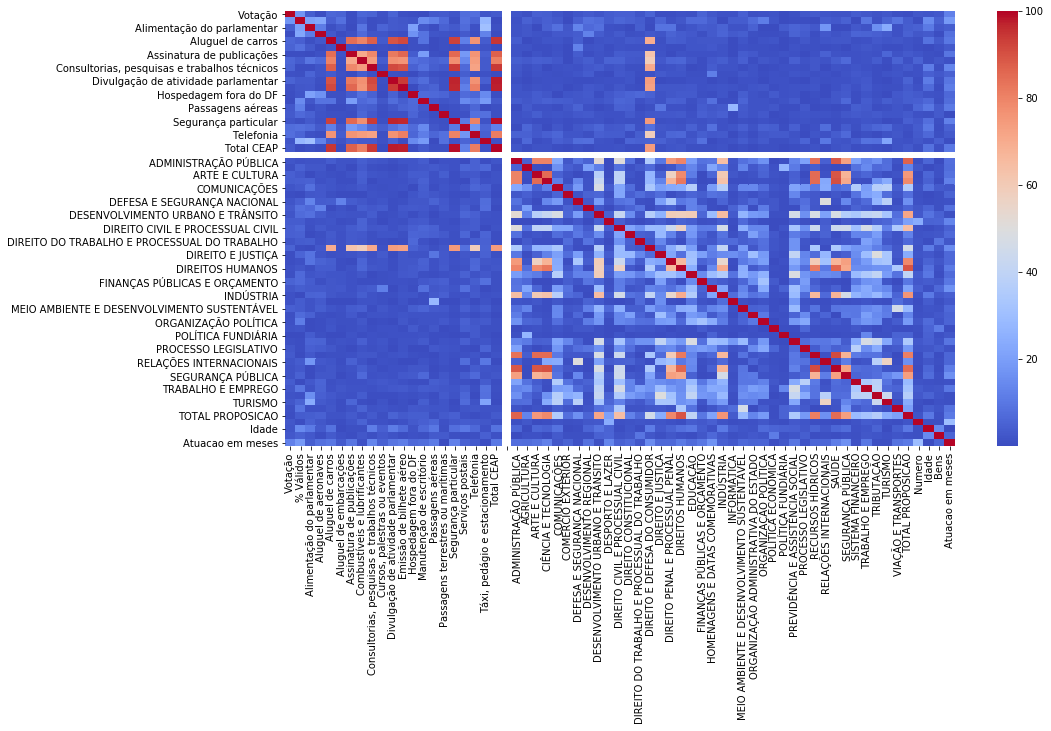

In [97]:
plt.figure(figsize=(15,8))
sns.heatmap(correlacao.replace(-100,100),cmap='coolwarm')

In [98]:
correlacao['Total CEAP'].idxmax()

'Segurança particular'

In [99]:
correlacao['Total CEAP'].max()

98.934362279906452

In [100]:
correlacao['Total CEAP'].sort_values(ascending=False)

Segurança particular                             98.934362
Divulgação de atividade parlamentar              97.665296
Emissão de bilhete aéreo                         97.619295
Aluguel de carros                                94.852150
Consultorias, pesquisas e trabalhos técnicos     94.433211
Assinatura de publicações                        87.187594
Telefonia                                        81.596277
Combustíveis e lubrificantes                     81.038973
DIREITO E DEFESA DO CONSUMIDOR                   74.527178
Serviços postais                                 12.315209
Atuacao em meses                                 10.331316
Idade                                             8.699287
TOTAL PROPOSICAO                                  3.494269
Votação                                           3.459124
Manutenção de escritório                          3.393845
SEGURANÇA PÚBLICA                                 2.556456
DIREITOS HUMANOS                                  2.4648

In [101]:
corr_CEAP = correlacao.drop(prop['AREAS_TEMATICAS_APRESENTACAO'].unique(), axis=1)
corr_CEAP.drop(prop['AREAS_TEMATICAS_APRESENTACAO'].unique(), axis=0, inplace=True)
corr_CEAP.drop('TOTAL PROPOSICAO', axis=1, inplace=True)
corr_CEAP.drop('TOTAL PROPOSICAO', axis=0, inplace=True)

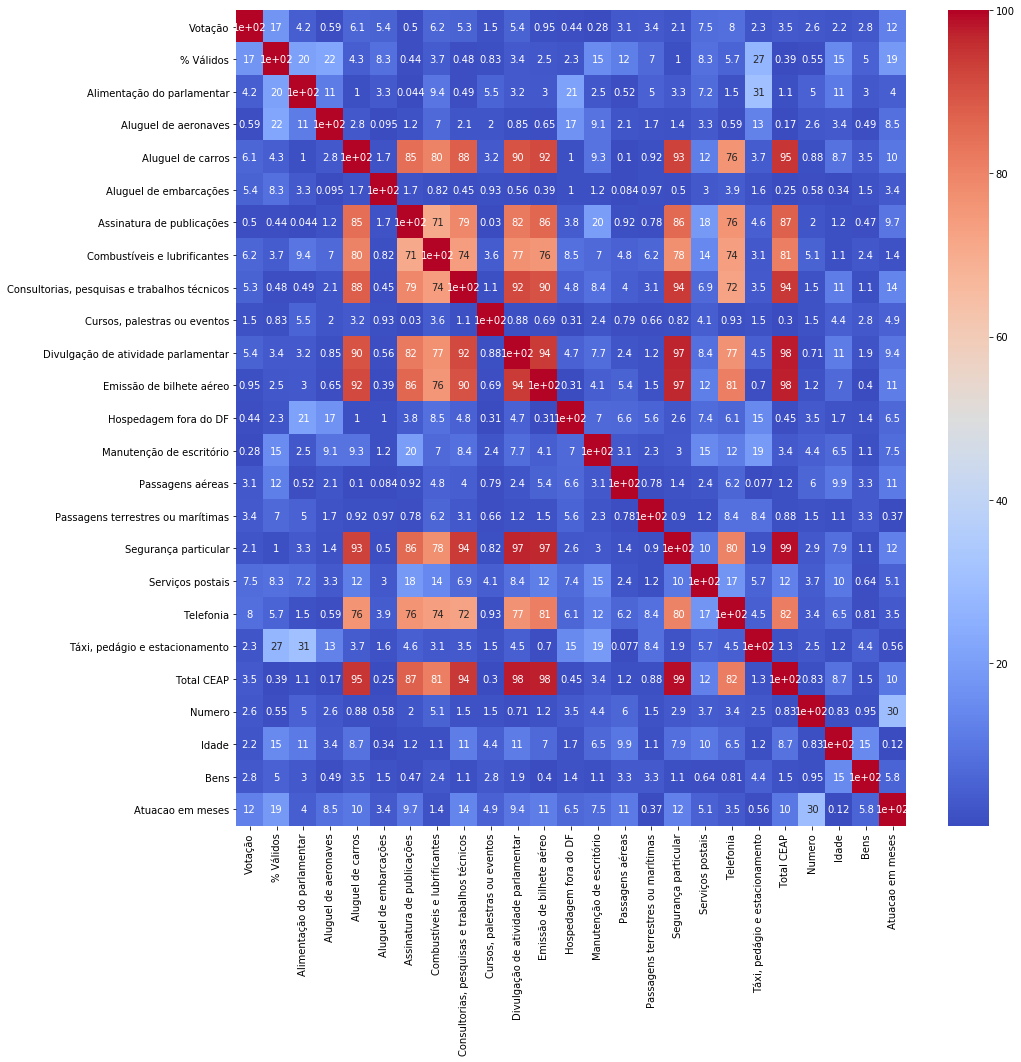

In [102]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_CEAP.replace(-100,100),cmap='coolwarm',annot=True)

In [103]:
corr_CEAP['Total CEAP'].idxmax()

'Segurança particular'

In [104]:
corr_CEAP['Total CEAP'].max()

98.934362279906452

In [105]:
corr_CEAP['Total CEAP'].sort_values(ascending=False)

Segurança particular                             98.934362
Divulgação de atividade parlamentar              97.665296
Emissão de bilhete aéreo                         97.619295
Aluguel de carros                                94.852150
Consultorias, pesquisas e trabalhos técnicos     94.433211
Assinatura de publicações                        87.187594
Telefonia                                        81.596277
Combustíveis e lubrificantes                     81.038973
Serviços postais                                 12.315209
Atuacao em meses                                 10.331316
Idade                                             8.699287
Votação                                           3.459124
Manutenção de escritório                          3.393845
Bens                                              1.524640
Táxi, pedágio e estacionamento                    1.336772
Passagens aéreas                                  1.162305
Alimentação do parlamentar                        1.1094

In [106]:
corr_PROP = correlacao.drop(dataset['txtDescricao'].unique(), axis=1)
corr_PROP.drop(dataset['txtDescricao'].unique(), axis=0, inplace=True)
corr_PROP.drop('Total CEAP', axis=1, inplace=True)
corr_PROP.drop('Total CEAP', axis=0, inplace=True)

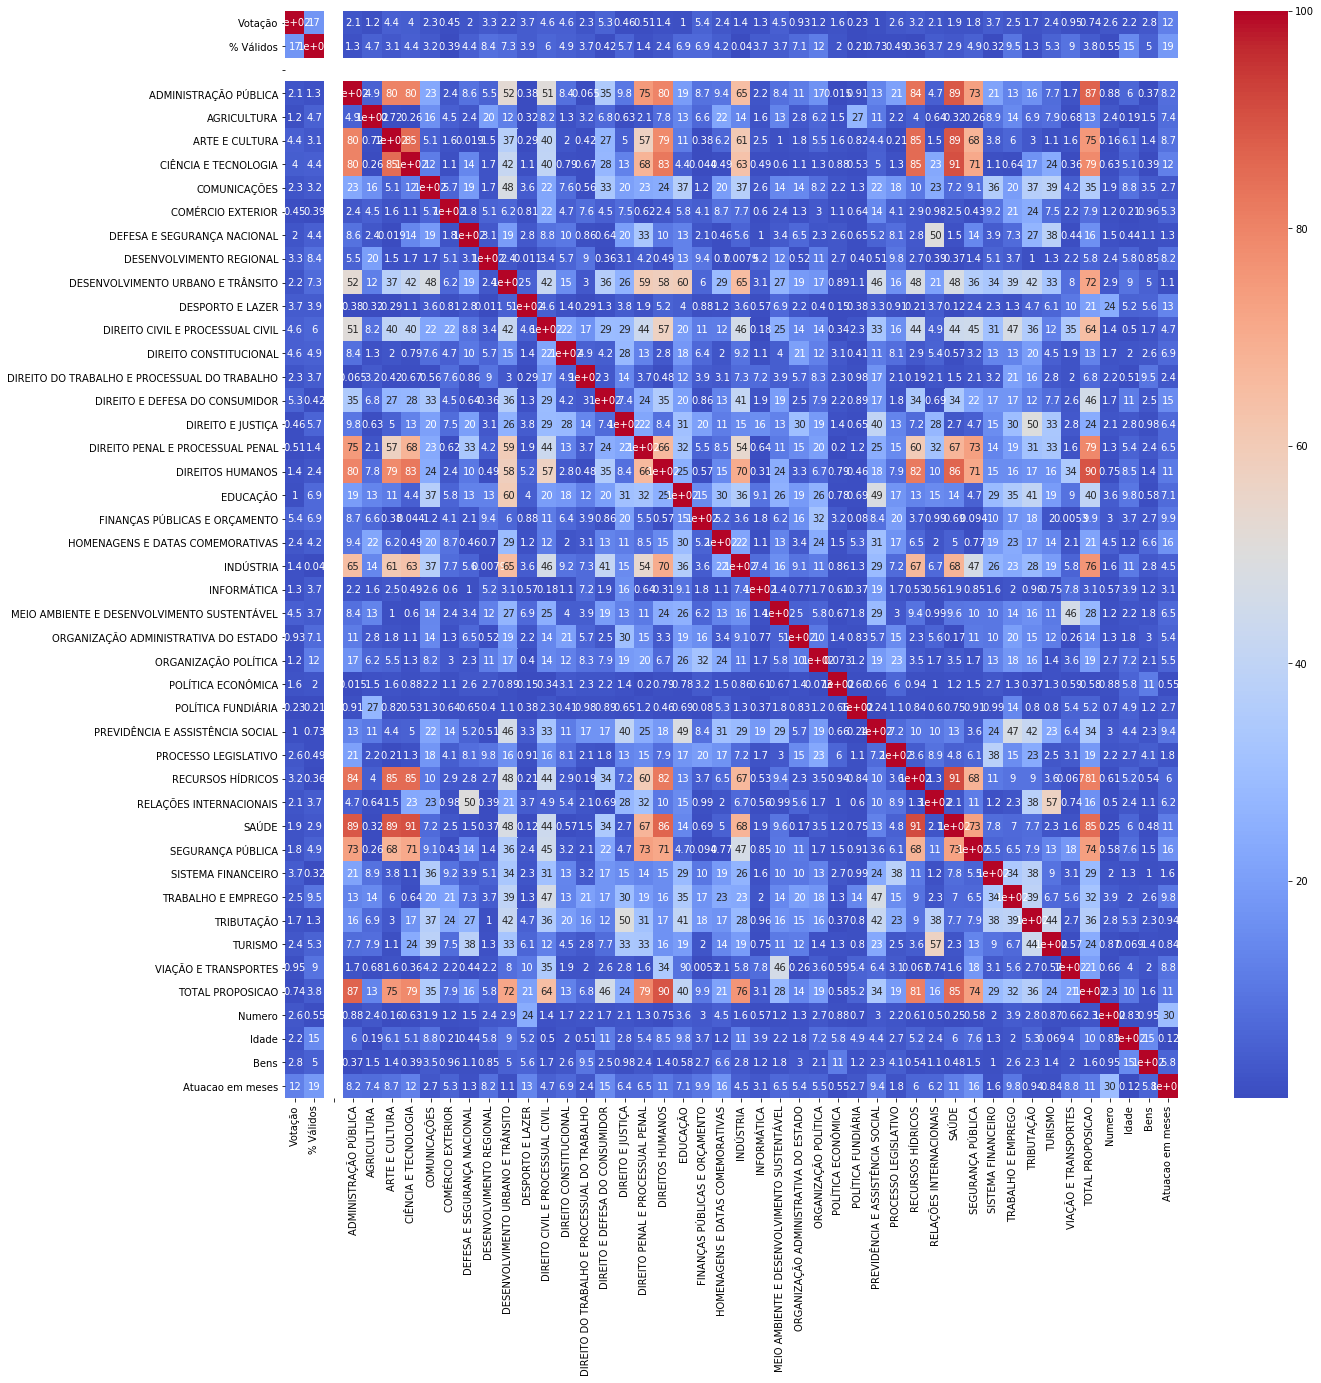

In [107]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_PROP.replace(-100,100),cmap='coolwarm',annot=True)

In [108]:
corr_PROP['TOTAL PROPOSICAO'].idxmax()

'DIREITOS HUMANOS'

In [109]:
corr_PROP['TOTAL PROPOSICAO'].max()

89.615248862679834

In [110]:
pd.get_dummies(deputados['Sexo'])

FEMININO  MASCULINO
0           0          1
1           1          0
2           0          1
3           0          1
4           0          1
5           0          1
6           0          1
7           0          1
8           0          1
9           0          1
10          0          1
11          0          1
12          0          1
13          0          1
14          0          1
15          0          1
16          0          1
17          0          1
18          0          1
19          0          1
20          0          1
21          0          1
22          0          1
23          1          0
24          0          1
25          0          1
26          0          1
27          0          1
28          0          1
29          0          1
..        ...        ...
554         0          1
555         0          1
556         0          1
557         0          1
558         0          1
559         0          1
560         0          1
561         1          0
562         0          1
563         0          1
564         0          1
565         0          1
566         0          1
567         0          1
568         0          1
569         1          0
570         0          1
571         0          1
572         0          1
573         0          1
574         0          1
575         0          1
576         0          1
577         1          0
578         0          1
579         0          1
580         0          1
581         0          1
582         0          1
583         0          1

[584 rows x 2 columns]

In [111]:
pd.get_dummies(deputados['Cor/Raça'])

Amarela  Branca  Parda  Preta
0          0       0      0      1
1          0       1      0      0
2          0       1      0      0
3          0       0      1      0
4          0       0      1      0
5          0       0      1      0
6          0       1      0      0
7          0       1      0      0
8          0       0      1      0
9          0       1      0      0
10         0       0      1      0
11         0       1      0      0
12         0       0      0      1
13         0       0      1      0
14         0       1      0      0
15         0       1      0      0
16         0       1      0      0
17         0       1      0      0
18         0       0      1      0
19         0       1      0      0
20         0       1      0      0
21         0       1      0      0
22         0       1      0      0
23         0       1      0      0
24         0       0      1      0
25         0       1      0      0
26         0       1      0      0
27         0       1      0      0
28         0       0      1      0
29         0       1      0      0
..       ...     ...    ...    ...
554        0       1      0      0
555        0       0      1      0
556        0       0      1      0
557        0       1      0      0
558        0       1      0      0
559        0       1      0      0
560        0       0      0      1
561        0       1      0      0
562        0       1      0      0
563        0       1      0      0
564        0       1      0      0
565        0       1      0      0
566        0       1      0      0
567        0       1      0      0
568        0       1      0      0
569        0       0      1      0
570        0       1      0      0
571        0       0      0      1
572        0       1      0      0
573        0       1      0      0
574        0       1      0      0
575        0       0      1      0
576        0       1      0      0
577        0       1      0      0
578        0       1      0      0
579        0       1      0      0
580        0       0      1      0
581        0       1      0      0
582        0       0      1      0
583        0       0      1      0

[584 rows x 4 columns]

In [112]:
pd.get_dummies(deputados['Instrucao'])

Ensino Fundamental completo  Ensino Fundamental incompleto  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   
5                              0                              0   
6                              0                              0   
7                              0                              0   
8                              0                              0   
9                              0                              0   
10                             0                              0   
11                             0                              0   
12                             0                              0   
13                             0                              0   
14                             0                              0   
15                             0                              0   
16                             0                              0   
17                             0                              0   
18                             0                              0   
19                             0                              0   
20                             0                              0   
21                             0                              0   
22                             0                              0   
23                             0                              0   
24                             0                              0   
25                             0                              0   
26                             0                              0   
27                             0                              0   
28                             0                              0   
29                             0                              0   
..                           ...                            ...   
554                            0                              0   
555                            0                              0   
556                            0                              0   
557                            0                              0   
558                            0                              0   
559                            0                              0   
560                            0                              0   
561                            0                              0   
562                            0                              0   
563                            0                              0   
564                            0                              0   
565                            0                              0   
566                            0                              0   
567                            0                              0   
568                            0                              0   
569                            0                              0   
570                            0                              0   
571                            0                              0   
572                            0                              0   
573                            0                              0   
574                            0                              0   
575                            0                              0   
576                            0                              0   
577                            0                              0   
578                            0                              0   
579                            0                              0   
580                            0                              0   
581                            0                    

In [113]:
cor = pd.get_dummies(deputados['Cor/Raça'])
deputados['Total CEAP'] = deputados['Total CEAP'].astype(float)
cor.corrwith(deputados['Total CEAP']).sort_values(ascending=False)*100

Preta      19.433611
Amarela    -0.017575
Parda      -1.393142
Branca     -8.095882
dtype: float64

In [114]:
instrucao = pd.get_dummies(deputados['Instrucao'])
instrucao.corrwith(deputados['Total CEAP']).sort_values(ascending=False)*100

Superior completo                2.202125
Ensino Fundamental incompleto   -0.091827
Ensino Médio incompleto         -0.183151
Ensino Fundamental completo     -0.718169
Superior incompleto             -1.186573
Lê e escreve                    -1.251464
Ensino Médio completo           -1.357732
dtype: float64

In [115]:
sexo = pd.get_dummies(deputados['Sexo'])
sexo.corrwith(deputados['Total CEAP']).sort_values(ascending=False)*100

MASCULINO    0.672457
FEMININO    -0.672457
dtype: float64

In [116]:
partidos.drop(['Idade','Bens','Atuacao em meses'], axis=1,inplace=True)

In [117]:
deputados['Partido Atual'].value_counts().sort_index()

DEM      34
PCdoB    15
PDT      28
PEN       3
PFL       1
PHS       5
PMDB     82
PODE     15
PP       54
PPS      15
PR       41
PRB      19
PROS      5
PRP       1
PRTB      1
PSB      42
PSC      11
PSD      29
PSDB     60
PSL       1
PSOL      5
PT       68
PTB      24
PTdoB     2
PV        9
REDE      3
SD       11
Name: Partido Atual, dtype: int64

In [118]:
partidos.sort_index(inplace=True)

In [119]:
partidos.head(19)

Votação  % Válidos  Alimentação do parlamentar  \
Partido Atual                                                   
DEM            3359093      87.75                 8565.369000   
PCdoB          1000659      25.14                 1488.127994   
PDT            2327260      84.82                 9382.762302   
PEN             169454       3.33                  515.699488   
PFL             277774       6.36                   11.648927   
PHS             330306      10.04                  560.733183   
PMDB           8002331     259.40                18138.599453   
PODE            953661      32.37                 6364.385162   
PP             7479052     150.15                13698.306052   
PPS            1282935      23.66                11016.425802   
PR             4976216     124.36                11836.775364   
PRB            1835492      43.00                 6044.616475   
PROS            575779      17.73                  515.082789   
PRP              66910       4.83                    0.000000   
PRTB             58095       4.20                  744.907500   
PSB            3887345     129.47                10750.434758   
PSC            1401700      33.68                 2784.521499   
PSD            2833324      87.17                 5934.060630   
PSDB           7554528     174.95                15634.284854   

               Aluguel de aeronaves  Aluguel de carros  \
Partido Atual                                            
DEM                    16869.787357      169472.269251   
PCdoB                   6498.194540       62550.448747   
PDT                     4777.417962      133313.194534   
PEN                        0.000000       19053.019612   
PFL                        0.000000           0.000000   
PHS                        0.000000       21283.454136   
PMDB                   25624.228518      530441.886132   
PODE                    9675.976598       74876.859334   
PP                     25523.121672      222517.786033   
PPS                     3695.204377       35963.186804   
PR                     19625.683939      180061.969985   
PRB                     3217.467010       82374.379037   
PROS                    3599.291921       16205.481493   
PRP                        0.000000           0.000000   
PRTB                       0.000000        6840.000000   
PSB                    17992.318209      215335.171776   
PSC                    11222.632765       22165.174887   
PSD                     4475.728783      114609.702941   
PSDB                   29171.784888      190446.202296   

               Aluguel de embarcações  Assinatura de publicações  \
Partido Atual                                                      
DEM                        305.761184                2877.616301   
PCdoB                        0.531067                 674.934804   
PDT                          0.000000                1137.870762   
PEN                          0.000000                 150.460251   
PFL                          0.000000                 205.758798   
PHS                          0.000000                  57.945929   
PMDB                       588.282266                7173.750466   
PODE                       115.867396                 639.485693   
PP                          85.278404                2063.247122   
PPS                         78.695848                 690.633540   
PR                          65.883489                1761.033473   
PRB                          0.000000                 106.676981   
PROS                         0.000000                  26.445446   
PRP                          0.000000                   0.000000   
PRTB                         0.000000                   0.000000   
PSB                         40.231735                2073.627372   
PSC                          0.000000                 125.154812   
PSD                       2149.606373                1538.833271   
PSDB                        14.451239                4579.293639   

 

In [120]:
for i in range(len(partidos)):
    partidos.iloc[i,2:] = partidos.iloc[i,2:]/deputados['Partido Atual'].value_counts().sort_index()[i]

In [121]:
partidos.sort_values('Total CEAP',ascending=True)

Votação  % Válidos  Alimentação do parlamentar  \
Partido Atual                                                   
PFL             277774       6.36                   11.648927   
PSOL            857545      10.60                   37.533376   
PTdoB           164779       1.78                   35.775668   
PPS            1282935      23.66                  734.428387   
PSDB           7554528     174.95                  260.571414   
PSL              52679       0.52                  246.419054   
PHS             330306      10.04                  112.146637   
PT             7096175     172.28                  233.940912   
PSC            1401700      33.68                  253.138318   
PP             7479052     150.15                  253.672334   
REDE            276880       4.39                  191.597468   
PSD            2833324      87.17                  204.622780   
PSB            3887345     129.47                  255.962732   
PR             4976216     124.36                  288.701838   
PTB            2418915      62.25                  132.240565   
PROS            575779      17.73                  103.016558   
PDT            2327260      84.82                  335.098654   
PV              621624      12.29                  192.551325   
SD             1360523      25.95                  327.027032   
PEN             169454       3.33                  171.899829   
PRB            1835492      43.00                  318.137709   
PCdoB          1000659      25.14                   99.208533   
PODE            953661      32.37                  424.292344   
DEM            3359093      87.75                  251.922618   
PRP              66910       4.83                    0.000000   
PRTB             58095       4.20                  744.907500   
PMDB           8002331     259.40                  221.202432   

               Aluguel de aeronaves  Aluguel de carros  \
Partido Atual                                            
PFL                        0.000000           0.000000   
PSOL                       0.000000        1587.414805   
PTdoB                    370.743482         580.330705   
PPS                      246.346958        2397.545787   
PSDB                     486.196415        3174.103372   
PSL                        0.000000        5690.183457   
PHS                        0.000000        4256.690827   
PT                       292.821374        3487.809925   
PSC                     1020.239342        2015.015899   
PP                       472.650401        4120.699741   
REDE                       0.000000         731.756249   
PSD                      154.335475        3952.058722   
PSB                      428.388529        5127.027899   
PR                       478.675218        4391.755365   
PTB                      889.313112        4066.991091   
PROS                     719.858384        3241.096299   
PDT                      170.622070        4761.185519   
PV                         0.000000        3767.093671   
SD                       528.600345        3669.716555   
PEN                        0.000000        6351.006537   
PRB                      169.340369        4335.493634   
PCdoB                    433.212969        4170.029916   
PODE                     645.065107        4991.790622   
DEM                      496.170216        4984.478507   
PRP                        0.000000           0.000000   
PRTB                       0.000000        6840.000000   
PMDB                     312.490592        6468.803489   

               Aluguel de embarcações  Assinatura de publicações  \
Partido Atual                                                      
PFL                          0.000000                 205.758798   
PSOL                         0.000000                 102.588671   
PTdoB                        0.000000                   0.804635   
PPS                          5.246390                  46.042236   
PSDB                         0.240854 

In [122]:
partidos.sort_values('TOTAL PROPOSICAO',ascending=True)

Votação  % Válidos  Alimentação do parlamentar  \
Partido Atual                                                   
PRTB             58095       4.20                  744.907500   
PEN             169454       3.33                  171.899829   
PFL             277774       6.36                   11.648927   
PRP              66910       4.83                    0.000000   
PROS            575779      17.73                  103.016558   
PSL              52679       0.52                  246.419054   
PSOL            857545      10.60                   37.533376   
PT             7096175     172.28                  233.940912   
PR             4976216     124.36                  288.701838   
PTB            2418915      62.25                  132.240565   
PRB            1835492      43.00                  318.137709   
PSDB           7554528     174.95                  260.571414   
PCdoB          1000659      25.14                   99.208533   
REDE            276880       4.39                  191.597468   
PSD            2833324      87.17                  204.622780   
DEM            3359093      87.75                  251.922618   
PSB            3887345     129.47                  255.962732   
PODE            953661      32.37                  424.292344   
PP             7479052     150.15                  253.672334   
PDT            2327260      84.82                  335.098654   
PSC            1401700      33.68                  253.138318   
PV              621624      12.29                  192.551325   
SD             1360523      25.95                  327.027032   
PMDB           8002331     259.40                  221.202432   
PPS            1282935      23.66                  734.428387   
PHS             330306      10.04                  112.146637   
PTdoB           164779       1.78                   35.775668   

               Aluguel de aeronaves  Aluguel de carros  \
Partido Atual                                            
PRTB                       0.000000        6840.000000   
PEN                        0.000000        6351.006537   
PFL                        0.000000           0.000000   
PRP                        0.000000           0.000000   
PROS                     719.858384        3241.096299   
PSL                        0.000000        5690.183457   
PSOL                       0.000000        1587.414805   
PT                       292.821374        3487.809925   
PR                       478.675218        4391.755365   
PTB                      889.313112        4066.991091   
PRB                      169.340369        4335.493634   
PSDB                     486.196415        3174.103372   
PCdoB                    433.212969        4170.029916   
REDE                       0.000000         731.756249   
PSD                      154.335475        3952.058722   
DEM                      496.170216        4984.478507   
PSB                      428.388529        5127.027899   
PODE                     645.065107        4991.790622   
PP                       472.650401        4120.699741   
PDT                      170.622070        4761.185519   
PSC                     1020.239342        2015.015899   
PV                         0.000000        3767.093671   
SD                       528.600345        3669.716555   
PMDB                     312.490592        6468.803489   
PPS                      246.346958        2397.545787   
PHS                        0.000000        4256.690827   
PTdoB                    370.743482         580.330705   

               Aluguel de embarcações  Assinatura de publicações  \
Partido Atual                                                      
PRTB                         0.000000                   0.000000   
PEN                          0.000000                  50.153417   
PFL                          0.000000                 205.758798   
PRP                          0.000000                   0.000000   
PROS                         0.000000 

In [123]:
deputados.groupby(["Partido Atual",'Sexo']).count()['Partido']

Partido Atual  Sexo     
DEM            FEMININO      2
               MASCULINO    32
PCdoB          FEMININO      6
               MASCULINO     9
PDT            FEMININO      2
               MASCULINO    26
PEN            MASCULINO     3
PFL            MASCULINO     1
PHS            MASCULINO     5
PMDB           FEMININO      8
               MASCULINO    74
PODE           FEMININO      1
               MASCULINO    14
PP             FEMININO      2
               MASCULINO    52
PPS            FEMININO      4
               MASCULINO    11
PR             FEMININO      4
               MASCULINO    37
PRB            FEMININO      3
               MASCULINO    16
PROS           MASCULINO     5
PRP            MASCULINO     1
PRTB           MASCULINO     1
PSB            FEMININO      6
               MASCULINO    36
PSC            FEMININO      1
               MASCULINO    10
PSD            FEMININO      1
               MASCULINO    28
PSDB           FEMININO      6
              

In [124]:
deputados.groupby(["Partido Atual",'Cor/Raça']).count()['Partido']

Partido Atual  Cor/Raça
DEM            Branca      30
               Parda        4
PCdoB          Branca       4
               Parda        7
               Preta        4
PDT            Branca      18
               Parda        9
               Preta        1
PEN            Branca       2
               Parda        1
PFL            Branca       1
PHS            Branca       3
               Parda        1
               Preta        1
PMDB           Branca      69
               Parda       11
               Preta        2
PODE           Branca      12
               Parda        3
PP             Branca      43
               Parda       11
PPS            Amarela      1
               Branca      13
               Parda        1
PR             Branca      33
               Parda        7
               Preta        1
PRB            Branca      12
               Parda        4
               Preta        3
PROS           Branca       5
PRP            Branca       1
PRTB           B

In [125]:
deputados.groupby(["Partido Atual",'Instrucao']).count()

Nome Civil  Partido  Coligação  \
Partido Atual Instrucao                                                       
DEM           Ensino Médio completo                   1        1          1   
              Superior completo                      28       28         28   
              Superior incompleto                     5        5          5   
PCdoB         Ensino Médio completo                   1        1          1   
              Superior completo                      11       11         11   
              Superior incompleto                     3        3          3   
PDT           Ensino Médio completo                   2        2          2   
              Superior completo                      24       24         24   
              Superior incompleto                     2        2          2   
PEN           Ensino Médio completo                   1        1          1   
              Superior completo                       1        1          1   
              Superior incompleto                     1        1          1   
PFL           Superior completo                       1        1          1   
PHS           Superior completo                       4        4          4   
              Superior incompleto                     1        1          1   
PMDB          Ensino Fundamental completo             1        1          1   
              Ensino Médio completo                   5        5          5   
              Ensino Médio incompleto                 1        1          1   
              Superior completo                      67       67         67   
              Superior incompleto                     8        8          8   
PODE          Ensino Fundamental completo             1        1          1   
              Ensino Médio completo                   4        4          4   
              Superior completo                       9        9          9   
              Superior incompleto                     1        1          1   
PP            Ensino Fundamental completo             2        2          2   
              Ensino Médio completo                   6        6          6   
              Ensino Médio incompleto                 1        1          1   
              Superior completo                      41       41         41   
              Superior incompleto                     4        4          4   
PPS           Superior completo                      14       14         14   
...                                                 ...      ...        ...   
PSB           Superior incompleto                     3        3          3   
PSC           Ensino Médio completo                   1        1          1   
              Superior completo                       8        8          8   
              Superior incompleto                     2        2          2   
PSD           Ensino Médio completo                   4        4          4   
              Ensino Médio incompleto                 1        1          1   
              Superior completo                      23       23         23   
              Superior incompleto                     1        1          1   
PSDB          Ensino Fundamental completo             1        1          1   
              Ensino Médio completo                   2        2          2   
              Superior completo                      57       57         57   
PSL           Ensino Médio completo                   1        1          1   
PSOL          Superior completo                       5        5          5   
PT            Ensino Fundamental completo             4        4          4   
              Ensino Fundamental incompleto           1        1          1   
              Ensino Médio completo                   2        2          2   
              Superior completo                      60       60         60   
              Superior incompleto                     1        1          1   
PTB           En